In [1]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

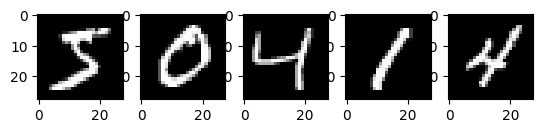

In [3]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()

# model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 15s - loss: 0.3817 - accuracy: 0.8875 - val_loss: 0.0807 - val_accuracy: 0.9751 - 15s/epoch - 50ms/step
Epoch 2/10
300/300 - 14s - loss: 0.0929 - accuracy: 0.9720 - val_loss: 0.0492 - val_accuracy: 0.9837 - 14s/epoch - 46ms/step
Epoch 3/10
300/300 - 15s - loss: 0.0668 - accuracy: 0.9789 - val_loss: 0.0368 - val_accuracy: 0.9875 - 15s/epoch - 49ms/step
Epoch 4/10
300/300 - 15s - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0324 - val_accuracy: 0.9891 - 15s/epoch - 49ms/step
Epoch 5/10
300/300 - 15s - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0304 - val_accuracy: 0.9904 - 15s/epoch - 50ms/step
Epoch 6/10
300/300 - 15s - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0274 - val_accuracy: 0.9914 - 15s/epoch - 50ms/step
Epoch 7/10
300/300 - 14s - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0267 - val_accuracy: 0.9909 - 14s/epoch - 47ms/step
Epoch 8/10
300/300 - 16s - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0247 - val_accuracy: 0.9925 - 16s/epoch - 52ms/step


In [6]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "mnist_model")